<a href="https://colab.research.google.com/github/Frans-Grau/P5-Forecasting/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as plt
import itertools
import pmdarima 
from statsmodels.tsa.arima.model import ARIMA

In [2]:
### Load the Datasets
df2016 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2016.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2017.csv')
df2018 = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Datasets/main/P5%20-%20Datasets/df2018.csv')

### Quick preprocessing
df_all = pd.concat([df2016,df2017,df2018], ignore_index = True, axis = 0)
df_all.drop(['Unnamed: 0','CANCELLED','DIVERTED'], axis=1, inplace= True)
df_all.dropna(inplace=True)
df_all['FL_DATE'] = pd.to_datetime(df_all['FL_DATE'])

### New column OP-Carrier code to full Airline Name
df_all['AIRLINE'] = df_all['OP_CARRIER'].apply(lambda x: 'Delta Airlines' if x == 'DL' else 'Southwest Airlines' if x=='WN' else 'American Airlines' if x=='AA' 
else 'JetBlue Airways' if x=='B6' else 'SkyWest Airlines' if x=='OO' else 'Atlantic Southeast Airlines' if x == 'EV' else 'United Airlines' if x == 'UA' 
else 'Pinnacle Airlines' if x == '9E' else 'Spirit Airlines' if x== 'NK' else 'Alaska Airlines' if x == 'AS' else 'Virgin America' if x == 'VX' else 'Frontier' if x =='F9' 
else 'Republic Airlines' if x == 'YX'else 'Hawaiian Airlines' if x == 'HA' else 'Envoy Air' if x == 'MQ' else 'Air Shuttle' if x == 'YV' else 'Allegiant Air' if x=='G4' 
else 'Comair')

df_all.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,AIR_TIME,DISTANCE,AIRLINE
0,2016-01-01,DL,ATL,GRR,2125,2130.0,5.0,2321,2319.0,92.0,640.0,Delta Airlines
1,2016-01-01,DL,LAX,ATL,2255,2256.0,1.0,600,547.0,207.0,1947.0,Delta Airlines
2,2016-01-01,DL,ATL,BNA,1233,1356.0,83.0,1239,1402.0,38.0,214.0,Delta Airlines
3,2016-01-01,DL,ATL,JAX,945,946.0,1.0,1050,1053.0,45.0,270.0,Delta Airlines
4,2016-01-01,DL,ATL,OKC,2110,2107.0,-3.0,2236,2224.0,116.0,761.0,Delta Airlines


In [3]:
### Group the delay minutes by date
df_delay = df_all.groupby('FL_DATE')['DEP_DELAY'].mean().reset_index()
df_delay = df_delay.sort_values('FL_DATE')
df_delay['Month'] = pd.DatetimeIndex(df_delay['FL_DATE']).month
df_delay = df_delay.sort_values('FL_DATE').set_index('FL_DATE')
df_delay

,DEP_DELAY,Month
FL_DATE,,
2016-01-01,6.106262,1
2016-01-02,9.728279,1
2016-01-03,15.104025,1
2016-01-04,10.579281,1
2016-01-05,12.293303,1
...,...,...
2018-12-27,20.029929,12
2018-12-28,32.150881,12
2018-12-29,15.529323,12


In [32]:
### ARIMA 
# Create the train set
train_set = df_delay.head(int(df_delay.shape[0]-273))
print('The minimum date we have is', train_set.index.min(), 'and the maximum date is ',  train_set.index.max())

# Create the test set
# test_set = df_delay[~df_delay.index.isin(train_set.index)]
test_set = df_delay.tail(273).drop('Month', axis=1)
print('The minimum date we have is', test_set.index.min(), 'and the maximum date is ',  test_set.index.max())

# #fit model
arima_model = ARIMA(train_set['DEP_DELAY'], order=(2,0,1))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

# #forecast
arima_model_fit.forecast()

The minimum date we have is 2016-01-01 00:00:00 and the maximum date is  2018-04-02 00:00:00
The minimum date we have is 2018-04-03 00:00:00 and the maximum date is  2018-12-31 00:00:00


c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978

                               SARIMAX Results                                
Dep. Variable:              DEP_DELAY   No. Observations:                  823
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2937.428
Date:                Thu, 05 Jan 2023   AIC                           5884.856
Time:                        15:14:34   BIC                           5908.421
Sample:                    01-01-2016   HQIC                          5893.897
                         - 04-02-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5481      1.858      5.678      0.000       6.907      14.189
ar.L1          1.3860      0.049     28.310      0.000       1.290       1.482
ar.L2         -0.4064      0.038    -10.599      0.0

2018-04-03    10.784641
Freq: D, dtype: float64

In [56]:
test_set

,DEP_DELAY
FL_DATE,
2018-04-03,12.306523
2018-04-04,11.730656
2018-04-05,5.262163
2018-04-06,11.131015
2018-04-07,6.083773
...,...
2018-12-27,20.029929
2018-12-28,32.150881
2018-12-29,15.529323


In [54]:
allx = list(range(0,274))
allx.reverse()
type(allx)

list

In [ ]:
freq = None

In [67]:
# df_delay.drop('Month', axis=1, inplace = True)
allx = list(range(0,274))   #[::-1] 
allx.reverse()
# print(allx)

def forecastx(x):
    test_set = df_delay.tail(x)
    train_set = df_delay.head(int(df_delay.shape[0]-test_set.shape[0]))
    arima_model = ARIMA(train_set['DEP_DELAY'], order=(2,0,1))
    arima_model_fit = arima_model.fit()
    forecast  = arima_model_fit.forecast()
    return forecast
   

dep_delay_forecast = list(map(forecastx, allx))
dep_delay_forecast


c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provi

[2018-04-03    10.784641
 Freq: D, dtype: float64,
 2018-04-04    10.706256
 Freq: D, dtype: float64,
 2018-04-05    10.54064
 Freq: D, dtype: float64,
 2018-04-06    7.554105
 Freq: D, dtype: float64,
 2018-04-07    10.242037
 Freq: D, dtype: float64,
 2018-04-08    7.918488
 Freq: D, dtype: float64,
 2018-04-09    7.452537
 Freq: D, dtype: float64,
 2018-04-10    8.686259
 Freq: D, dtype: float64,
 2018-04-11    6.842376
 Freq: D, dtype: float64,
 2018-04-12    5.417415
 Freq: D, dtype: float64,
 2018-04-13    6.317359
 Freq: D, dtype: float64,
 2018-04-14    6.989865
 Freq: D, dtype: float64,
 2018-04-15    7.098586
 Freq: D, dtype: float64,
 2018-04-16    15.902651
 Freq: D, dtype: float64,
 2018-04-17    18.338265
 Freq: D, dtype: float64,
 2018-04-18    9.015269
 Freq: D, dtype: float64,
 2018-04-19    6.467629
 Freq: D, dtype: float64,
 2018-04-20    8.291108
 Freq: D, dtype: float64,
 2018-04-21    7.044461
 Freq: D, dtype: float64,
 2018-04-22    6.753228
 Freq: D, dtype: floa

In [69]:
dep_delay_forecast

[2018-04-03    10.784641
 Freq: D, dtype: float64,
 2018-04-04    10.706256
 Freq: D, dtype: float64,
 2018-04-05    10.54064
 Freq: D, dtype: float64,
 2018-04-06    7.554105
 Freq: D, dtype: float64,
 2018-04-07    10.242037
 Freq: D, dtype: float64,
 2018-04-08    7.918488
 Freq: D, dtype: float64,
 2018-04-09    7.452537
 Freq: D, dtype: float64,
 2018-04-10    8.686259
 Freq: D, dtype: float64,
 2018-04-11    6.842376
 Freq: D, dtype: float64,
 2018-04-12    5.417415
 Freq: D, dtype: float64,
 2018-04-13    6.317359
 Freq: D, dtype: float64,
 2018-04-14    6.989865
 Freq: D, dtype: float64,
 2018-04-15    7.098586
 Freq: D, dtype: float64,
 2018-04-16    15.902651
 Freq: D, dtype: float64,
 2018-04-17    18.338265
 Freq: D, dtype: float64,
 2018-04-18    9.015269
 Freq: D, dtype: float64,
 2018-04-19    6.467629
 Freq: D, dtype: float64,
 2018-04-20    8.291108
 Freq: D, dtype: float64,
 2018-04-21    7.044461
 Freq: D, dtype: float64,
 2018-04-22    6.753228
 Freq: D, dtype: floa

In [71]:
df = pd.DataFrame(dep_delay_forecast)
df.to_pickle('dep_delay_forecast.pickle')

In [31]:
test_set

,DEP_DELAY
FL_DATE,
2018-04-03,12.306523
2018-04-04,11.730656
2018-04-05,5.262163
2018-04-06,11.131015
2018-04-07,6.083773
...,...
2018-12-27,20.029929
2018-12-28,32.150881
2018-12-29,15.529323


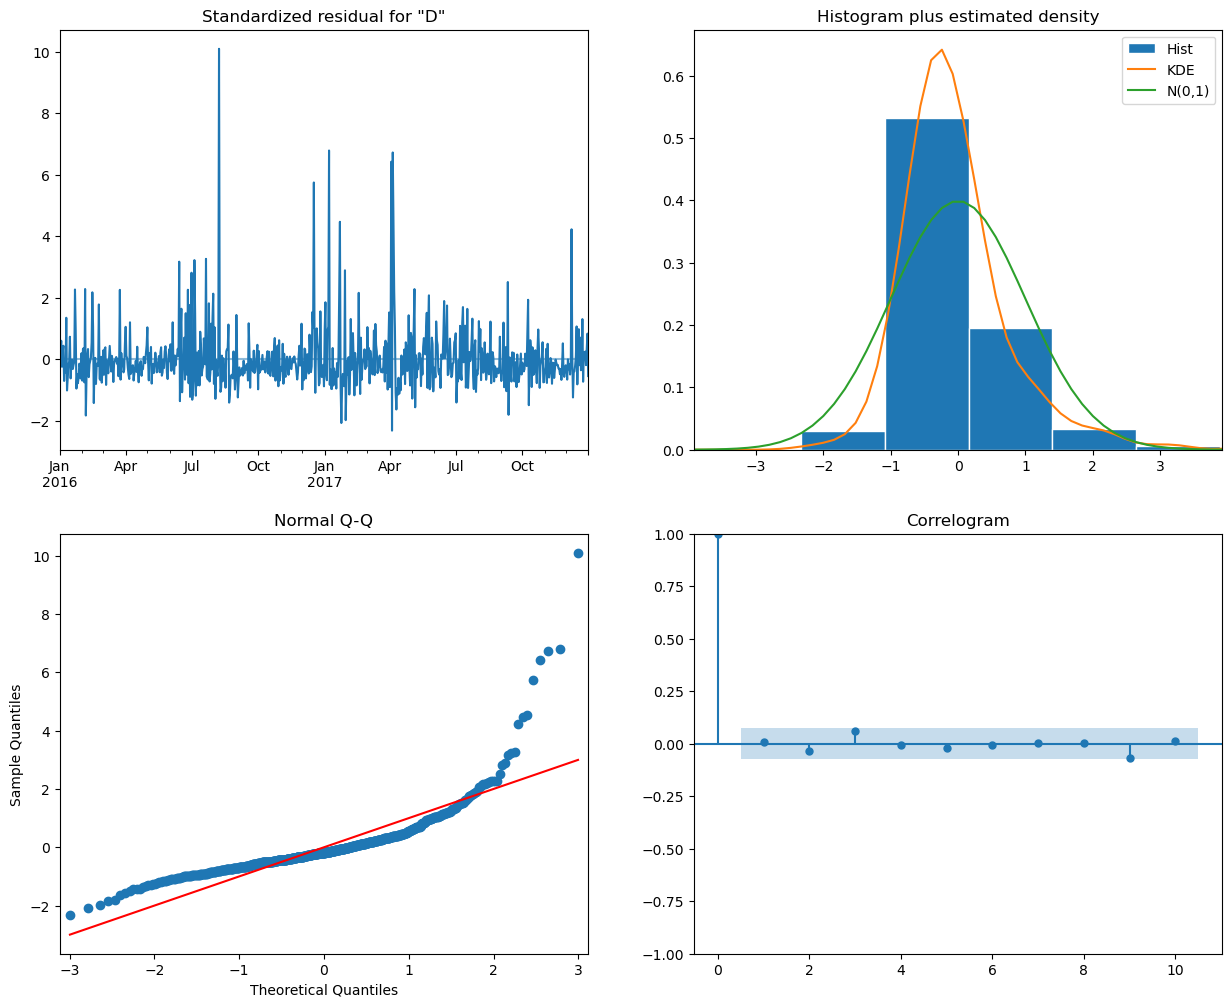

In [5]:
arima_model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

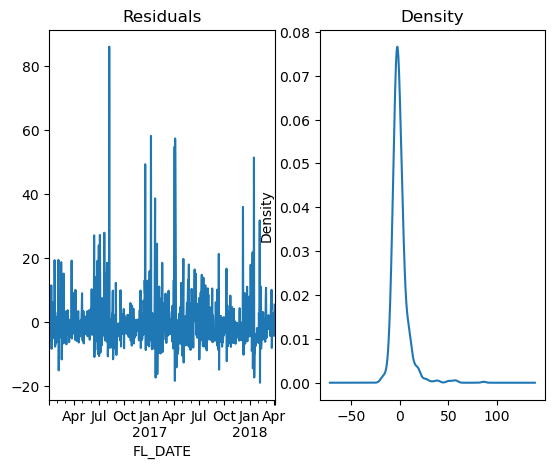

In [34]:
residuals = arima_model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

<AxesSubplot:xlabel='FL_DATE'>

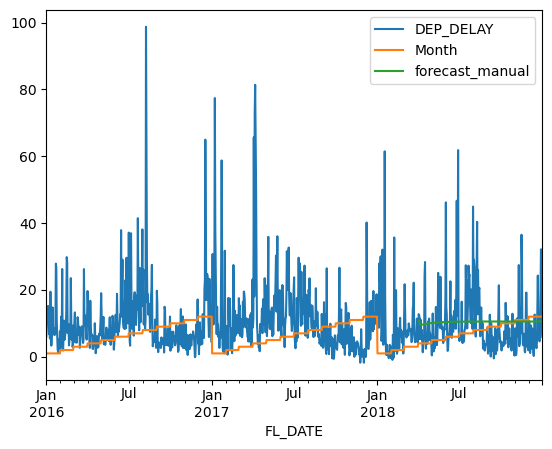

In [38]:

forecast_test = arima_model_fit.forecast(len(test_set))

df_delay['forecast_manual'] = [None]*len(train_set) + list(forecast_test)

df_delay.plot()

In [39]:
df_delay['forecast_manual']

FL_DATE
2016-01-01          NaN
2016-01-02          NaN
2016-01-03          NaN
2016-01-04          NaN
2016-01-05          NaN
                ...    
2018-12-27    10.547984
2018-12-28    10.547987
2018-12-29    10.547990
2018-12-30    10.547992
2018-12-31    10.547995
Name: forecast_manual, Length: 1096, dtype: float64

In [ ]:
### Evaluation


c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\frans\anaconda3\envs\Data\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


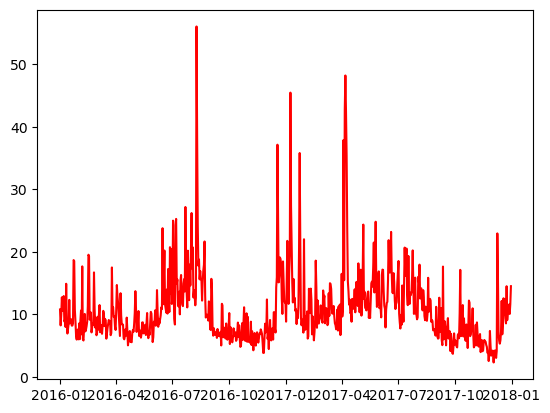

In [8]:
results = arima_model.fit()
plt.plot(results.fittedvalues, color = 'red')

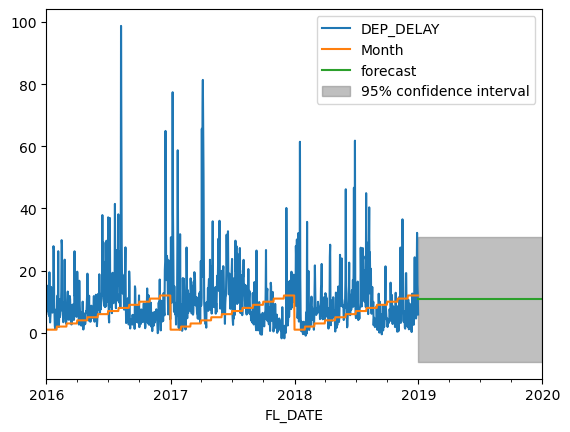

In [15]:
fig, ax = plt.subplots()
ax = df_delay.plot(ax=ax)
plot_predict(results,'2019','2020',ax=ax)
plt.show()
